In [3]:
# importamos librerias necesarias
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

In [124]:
# importando dataset
becariospdb = pd.read_csv('perdidadebecas.csv')
print(becariospdb.head(1))

                       convocatoria region                     motivo  \
0  Beca 18 Modalidad Ordinaria 2012   LIMA  Becarios que desaprobaron   

    resolucion_ret_beca fec_resolucion_ret_beca fec_Postulacion  \
0  RESOLUCION JEFATURAL                 2014-11         2012-04   

  tipoinstitucion          institucioneducativa institucionsede  \
0     Universidad  NACIONAL MAYOR DE SAN MARCOS       SEDE LIMA   

     carreradescripcion     genero  
0  INGENIERIA GEOLOGICA  MASCULINO  


In [125]:
# Tenemos como objetivo predecir el motivo por el cual puede renunciar un becario
# Para usar la tecnica de arbol de decision solo dos tipos de la categoria motivo
# Por ello trabajaremos solo con los siguientes: 
# Becarios que desaprobaron = 1 
# Becarios que abandonaron los estudios (No recibieron subvencion) = 0
# Por lo tanto eliminamos de la categoria motivo el resto de tipos.

becariospdbv1 = becariospdb[(becariospdb.motivo !='Becario Egresado Aprobado') &
            (becariospdb.motivo != 'Becarios que renunciaron') &
           (becariospdb.motivo != 'Becario Egresado Desaprobado') &
           (becariospdb.motivo != 'Becarios declarados nulos') &
           (becariospdb.motivo != 'Becarios que falsificaron informaciÃ³n') &
           (becariospdb.motivo != 'Becarios que no se presentaron con RJ (No recibieron subvencion)') &
           (becariospdb.motivo != 'Becarios que abandonaron los estudios (Recibieron subvencion)') &
           (becariospdb.motivo != 'Becarios que fallecieron') &
           (becariospdb.motivo != 'Becarios que no se presentaron con RJ (Si recibieron subvencion)') &
           (becariospdb.motivo != 'Becarios observados y/o en regularizacion')]


In [126]:
print(becariospdbv1)

                                            convocatoria      region  \
0                       Beca 18 Modalidad Ordinaria 2012        LIMA   
1                       Beca 18 Modalidad Ordinaria 2012        LIMA   
2                       Beca 18 Modalidad Ordinaria 2012        LIMA   
3                       Beca 18 Modalidad Ordinaria 2012        LIMA   
4                       Beca 18 Modalidad Ordinaria 2012        LIMA   
5                       Beca 18 Modalidad Ordinaria 2012        LIMA   
6                       Beca 18 Modalidad Ordinaria 2012        LIMA   
7                       Beca 18 Modalidad Ordinaria 2012        LIMA   
8                       Beca 18 Modalidad Ordinaria 2012        LIMA   
9                       Beca 18 Modalidad Ordinaria 2012        LIMA   
10                      Beca 18 Modalidad Ordinaria 2012        LIMA   
11                      Beca 18 Modalidad Ordinaria 2012        LIMA   
12                      Beca 18 Modalidad Ordinaria 2012        

In [127]:
becariosp = becariospdbv1.drop_duplicates() #Eliminamos las instancias duplicadas

In [128]:
print(becariosp)

                                            convocatoria      region  \
0                       Beca 18 Modalidad Ordinaria 2012        LIMA   
1                       Beca 18 Modalidad Ordinaria 2012        LIMA   
2                       Beca 18 Modalidad Ordinaria 2012        LIMA   
3                       Beca 18 Modalidad Ordinaria 2012        LIMA   
4                       Beca 18 Modalidad Ordinaria 2012        LIMA   
5                       Beca 18 Modalidad Ordinaria 2012        LIMA   
6                       Beca 18 Modalidad Ordinaria 2012        LIMA   
7                       Beca 18 Modalidad Ordinaria 2012        LIMA   
9                       Beca 18 Modalidad Ordinaria 2012        LIMA   
10                      Beca 18 Modalidad Ordinaria 2012        LIMA   
11                      Beca 18 Modalidad Ordinaria 2012        LIMA   
13                      Beca 18 Modalidad Ordinaria 2012        LIMA   
14                      Beca 18 Modalidad Ordinaria 2012        

In [129]:
# tabla de frecuencia de motivo de perdida de beca o conteo por motivo de perdida de beca
pd.value_counts(becariosp['motivo'])

Becarios que desaprobaron                                           3296
Becarios que abandonaron los estudios (No recibieron subvencion)    3145
Name: motivo, dtype: int64

In [130]:
# Revisar instancias region,tipoinstitucion y genero
pd.value_counts(becariosp['region'])

LIMA             2602
JUNIN             415
LORETO            316
PIURA             306
LA LIBERTAD       280
CUSCO             250
AREQUIPA          250
PUNO              199
LAMBAYEQUE        190
AYACUCHO          156
SAN MARTIN        154
CAJAMARCA         139
PASCO             133
HUANCAVELICA      128
TACNA             126
APURIMAC          120
AMAZONAS          117
ANCASH            115
UCAYALI            87
ICA                85
HUANUCO            73
MOQUEGUA           43
CALLAO             43
MADRE DE DIOS      41
TUMBES             41
CUBA               22
HONDURAS            5
ESPAÃ‘A             2
ARGENTINA           1
BRASIL              1
FRANCIA             1
Name: region, dtype: int64

In [131]:
becariosp['region'].replace("ESPAÃ‘A","ESPAÑA",inplace=True)

becariosp['tipoinstitucion'].replace("Instituto de EducaciÃ³n Superior TecnolÃ³gico","Instituto de Educación Superior Tecnológico",inplace=True)
becariosp['tipoinstitucion'].replace("Centro de EducaciÃ³n TÃ©cnico-Productiva","Centro de Educación técnico-Productiva",inplace=True)
becariosp['tipoinstitucion'].replace("Instituto de EducaciÃ³n Superior PedagÃ³gico","Instituto de Educación Superior Pedagógico",inplace=True)
becariosp['tipoinstitucion'].replace("Instituto de EducaciÃ³n Superior","Instituto de Educación Superior",inplace=True)


becariosp['motivo'].replace("Becarios que desaprobaron","1",inplace=True)
becariosp['motivo'].replace("Becarios que abandonaron los estudios (No recibieron subvencion)","0",inplace=True)




#becariosp.loc({'tipoinstitucion': {"Instituto de EducaciÃ³n Superior TecnolÃ³gico":"Instituto de Educación Superior Tecnológico"}})
#"Centro de EducaciÃ³n TÃ©cnico-Productiva": "Centro de Educación técnico-Productiva",
#"Instituto de EducaciÃ³n Superior": "Instituto de Educación Superior" Instituto de EducaciÃ³n Superior PedagÃ³gico

/home/eder/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [134]:
# Verificamos
pd.value_counts(becariosp['motivo'])

1    3296
0    3145
Name: motivo, dtype: int64

In [136]:
#Observamos algunos cambios viendo graficas
# tabla de contingencia en porcentajes relativos total motivo/tipoinstitucion
pd.crosstab(index=becariosp['motivo'], columns=becariosp['tipoinstitucion'],margins=True).apply(lambda r: r/len(becariosp) *100,axis=1)

tipoinstitucion,Academia Pre-Universitaria,Centro de Educación técnico-Productiva,Instituto,Instituto de Educación Superior,Instituto de Educación Superior Pedagógico,Instituto de Educación Superior Tecnológico,Instituto de Idiomas,Universidad,All
motivo,,,,,,,,,
0,0.015526,0.527868,0.046577,0.015526,0.481292,35.646639,0.217358,11.877038,48.827822
1,0.000000,1.443875,0.263934,0.000000,0.201832,22.589660,0.170781,26.502096,51.172178
All,0.015526,1.971744,0.310511,0.015526,0.683124,58.236299,0.388138,38.379134,100.000000


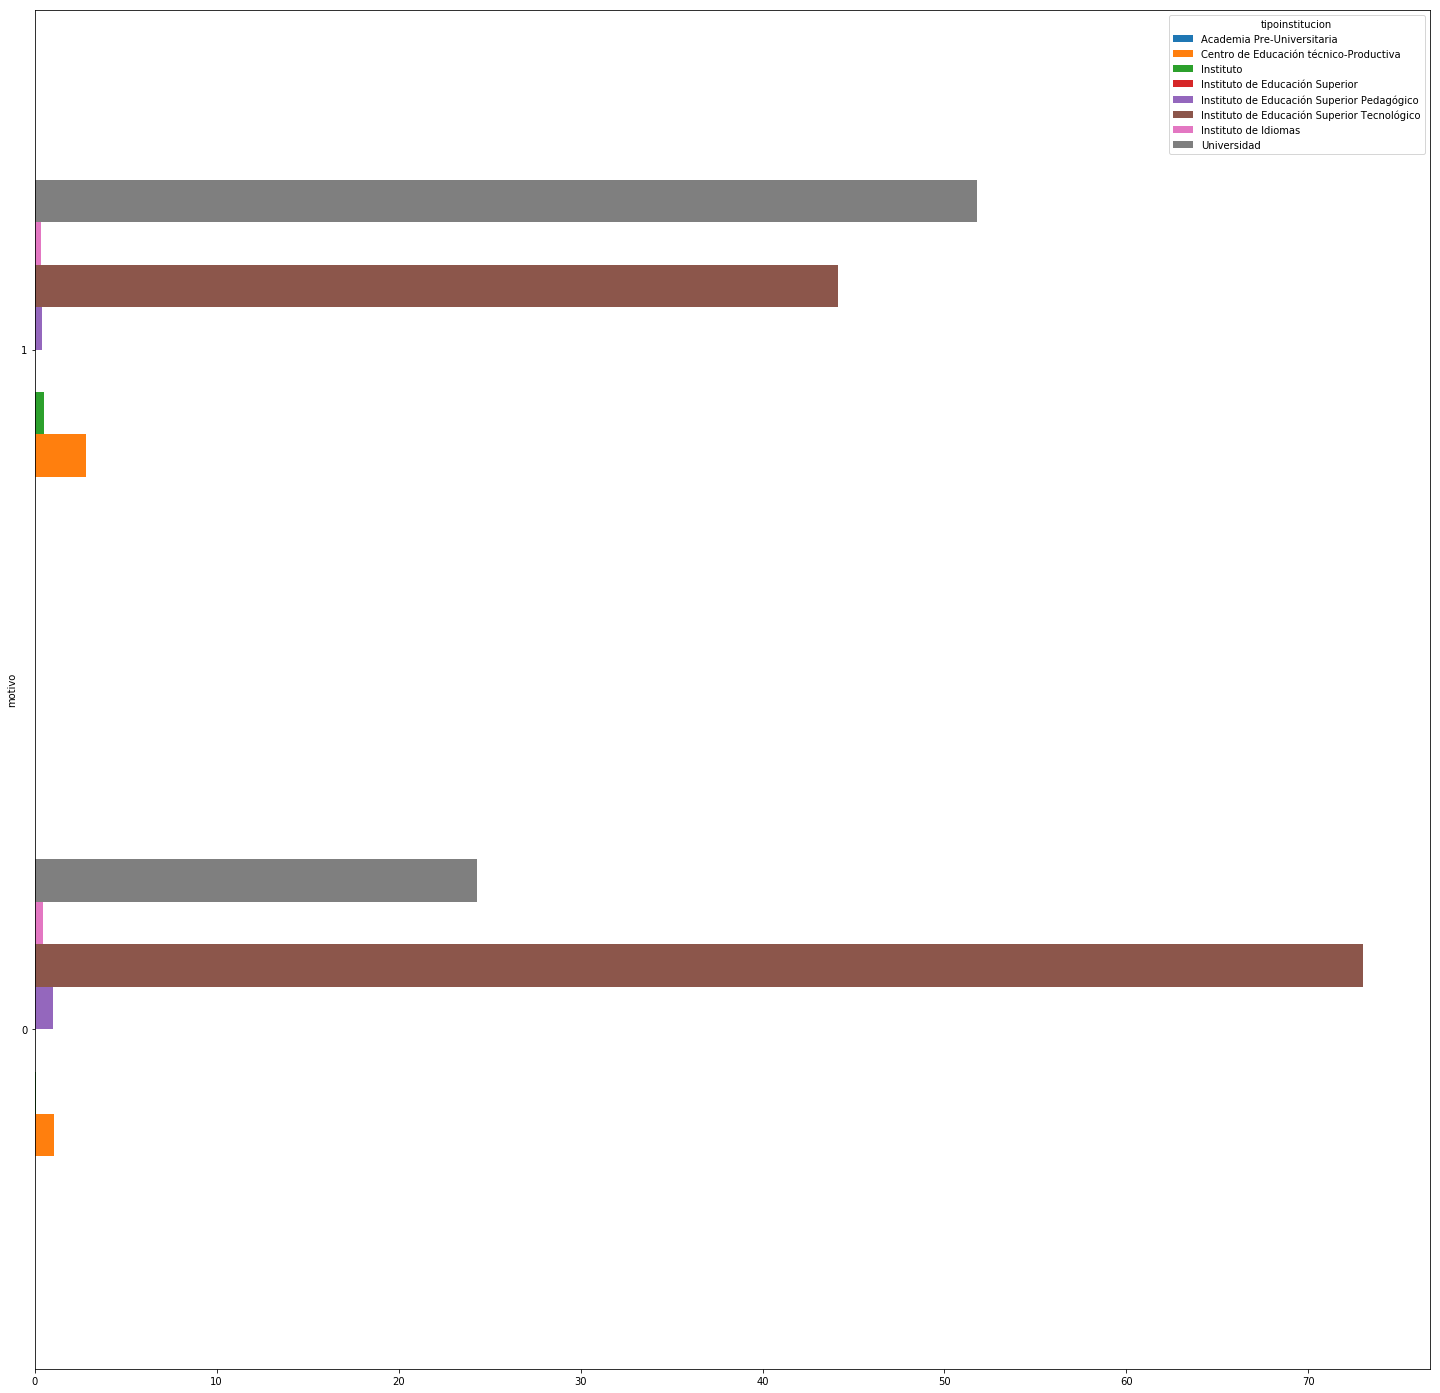

In [140]:
# Gráfico de barras de motivo/tipoinstitucion 
pd.crosstab(index=becariosp['motivo'], columns=becariosp['tipoinstitucion']).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='barh',legend=True, figsize=(25, 25))

In [141]:
becariosp.describe()

,convocatoria,region,motivo,resolucion_ret_beca,fec_resolucion_ret_beca,fec_Postulacion,tipoinstitucion,institucioneducativa,institucionsede,carreradescripcion,genero
count,6441,6441,6441,6249,2716,6440,6441,6441,6441,6441,6441
unique,50,31,2,1,38,39,8,160,139,364,2
top,Beca 18 Modalidad Ordinaria 2014,LIMA,1,RESOLUCION JEFATURAL,2014-09,2015-01,Instituto de Educación Superior Tecnológico,SENATI,SEDE LIMA,MECANICO AUTOMOTRIZ,MASCULINO
freq,1032,2602,3296,6249,263,1249,3751,1737,1068,447,3826


In [135]:
#Exportamos nuestro data set casi preprocesado
becariosp.to_csv('datapronabeclimpio.csv')